# Artificial Neural Networks with keras

Artificial Neural Networks are the state of the art of machine learning, they main appeal is very powerful and scalable. They can classify billions of 
images, understance human language... etc. In this chapter we will discuss them extensively and after that we will talk about an amelioration of them 
called multilayer perceptron.

## Perceptron

A Perceptron is one of the simplest types of artificial neural networks and serves as the foundation for more complex neural network models. It is often 
used for binary classification tasks. The perceptron is a linear classifier, meaning it makes decisions by finding a linear boundary that separates 
different classes of data. A perceptron consists of a single neuron. It has input features, weights, a bias, and an activation function. Its function
by having basic units called __TLU__(Threshold Logical Unit) and every TLU is connected to each input all of this in a single layer. This type of networks are trained by mimicking the behavior of biological brains, meaning that connections that produce correct predictions are reenforced and inversely others 
that produce incorrect predictions are weakened. Here is the equation defining the learning rule:
$$w_{i, j}^{(next step)} = w_{i, j} + \eta (y_j + \hat{y_j})x_i $$
In this equation $w_{i, j}$ is the connection weight between the input _i_ and the neuron _j_, $x_i$ is the $i^{th}$ input value of the current training
instance, $\hat{y}$ is the output of the $j^{th}$ output neuron for the current training instance, y is the target output of the $j^{th}$ output neuron for the current training instance and $\eta$ is the learning rate. Scikit-learn possess a _Perceptron_ class that can be used exactly like a _LogisticRegressor_
class:

In [2]:
from sklearn.linear_model import Perceptron
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)
X_new = [[2, 0.5], [3, 1]]
print(per_clf.predict(X_new))
# We can do the same thing with a SGDClassifier by setting its loss parameter to "perceptron", learning_rate to "constant" and eta0=1

[ True False]


The proeminent problem with perceptron is that they are incapable of solving basic problems such as the exclusive OR(XOR). To mitigate this problem the
solution is to simply stack multiple layers of them which bring the topic of __multilayer perceptrons(MLP)__.

## Multilayer Perceptron and Backpropagation

A MLP is composed of one layer of inputs, one or more layers of TLU (called the _hidden layer_) and an output layer. The way to train a MLP is to use the
algorithm called __reverse mode automatic differentiation__, it computes the gradient of the neural network's error taking into account all the model's
parameters. Meaning its find the best value for the connection weights and bias to apply in order to obtain an optimal model. At the end of the process, we
can use this gradients to perform a gradient descent step which will gradually drop the error rate of the model until it reaches a minimum. This process
is called _backpropagation_. Let's look at how the backpropagation is performed step by step in details:
- It handles one mini-batch at a time and goes through the whole training set multiple times (each loop is called an _epoch_).
- Each mini-batch become the input layer and they are passed trough the hidden layers similarly to how we would make predictions except all the intermediate
 results are kept for the backward pass. This phase is called the _forward pass_.
- The algorithm measure the error by using a cost function that compares the output(s) to the desired output(s).
- Then it computes how much each bias and weight contribute to the error rate by following a concept known as the _chain rule_.
- After that the algorithm try to measure how much of the error is contributed by the layers(still using the chain rule) working its way backward until
 it comes back to the input layer. This reverse pass efficiently measures the error gradient across all the connection weights and biases in the network by 
 propagating the error gradient backward through the network. This is the _backward pass_.
- Finally the algorithm perform gradient descent to tweak the parameters using the error gradient computed earlier.

__Side Note__: For the first pass of course we should initialize the inputs weights randomly and the bias term at 0 (or randomly both are fine).  
In order for backpropagation to work, the step function have to be swapped to the logistic function(also called the sigmoid function):
$$\sigma(z) = \frac{1}{1 + \exp(-z)} $$
But it can work with other activation function other than this one such as:
- The hyperbolic tangent function:
 $$\tanh(z) = 2\sigma (2z) - 1 $$
- The rectified linear unit function (__ReLU__):
 $$ReLU(z) = \max(0, z) $$

### Regression tasks with MLPs

Scikit-Learn includes an MLPRegressor class, we can use it to build an MLP with 3 hidden layers composed of 50 neurons each, and train it on our housing
dataset.

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

print(f"Prediction on the validation set: {y_pred}")
print(f"Error rate on the predictions: {rmse}") # Error rate we will be similar to a random forest classifier

Prediction on the validation set: [1.28463736 2.3567012  1.37453837 ... 2.00380092 1.63780066 1.98379911]
Error rate on the predictions: 0.505332665796845


__Side Note__: We did not use any activation function here so the mlp can output any value, but if we wanted it to only output a positive value then we could use ReLU as activation function or its smoothed variant called _softplus_:
$$softplus(z) = \log(1 + \exp(z)) $$
Softplus's output is close to zero when z is negative and close to z when z is positive. We should also note that _MLPRegressor_ does not support to be
passed an activation function.

### Classification with MLPs

We can also use MLPs for classification problems (from a simple binary classification to a multilabel binary classification). Scikit-Learn has an 
_MLPClassifier_ class in the _sklearn.neural\_network_ package. It is almost identical to the MLPRegressor class, except that it minimizes the cross 
entropy rather than the MSE. It’s almost a linear task, so a single layer with 5 to 10 neurons should suffice (make sure to scale the features).

### MLP with Keras using the Sequential API

Let' demonstrate how to use this library by building an image classification algorithm for that we will use the MNIST fashion dataset.

In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# To simplify we are going to scale the pixel intensity to 0-1 range
X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

# Now we are going to build the model using 2 hidden layers
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten()) # The flatten layer just reshape the 28x28 image into a 1D array
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
# Alternatively we can pass the list of layers directly when creating the sequential model
"""
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
"""
# Now we must compile the model in order to specify the loss function, optimizer and other metrics we would want to have
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

The loss function we have chosen to use is the sparse categorical crossentropy because the target values are sparse(they are mutually exclusive) as for the
optimizer we use "sgd" which means it will use schotastic gradient descent after the backpropagation(other optimizers more performant exist). 

In [3]:
# Now we can train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6815 - loss: 0.9750 - val_accuracy: 0.8260 - val_loss: 0.5067
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8270 - loss: 0.5053 - val_accuracy: 0.8364 - val_loss: 0.4521
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8439 - loss: 0.4516 - val_accuracy: 0.8412 - val_loss: 0.4285
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8538 - loss: 0.4207 - val_accuracy: 0.8488 - val_loss: 0.4135
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8599 - loss: 0.3985 - val_accuracy: 0.8520 - val_loss: 0.4027
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8657 - loss: 0.3811 - val_accuracy: 0.8564 - val_loss: 0.3934
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8713 - loss: 0.3667 - val_accuracy: 0.8584 - val_loss: 0.3876
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8753 - loss: 0.35

The history object the model returns a History object containing the training parameters (_history.params_), the list of epochs it went through 
(_history.epoch_), and most importantly a dictionary (_history.history_) containing the loss and extra metrics it measured at the end of each epoch on the 
training set and on the validation set. If we plot this dataframe we obtain the learning curve of the model:

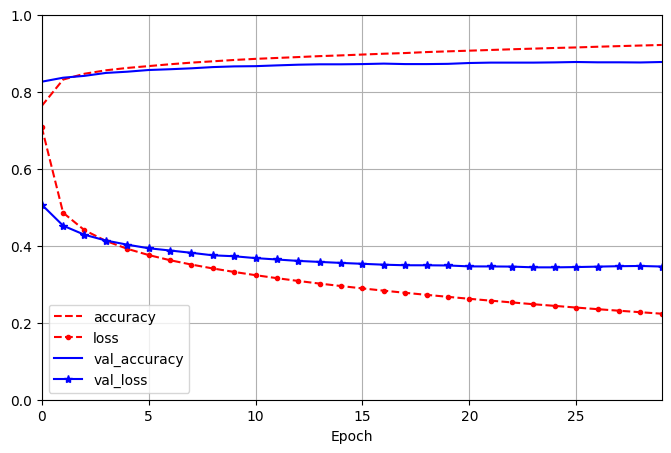

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()

Here we can observe that the model perform a bit better on the training set than on the validation set (which means that a little bit of overfitting is 
taking place).

### Regression tasks with the Sequential API

Let's build the a neural net and test it on the housing dataset.

In [6]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer, # This does the same thing as a StandardScaler
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

e:\Notes\handsonml\mlnotes\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - RootMeanSquaredError: 3.0623 - loss: 9.4595 - val_RootMeanSquaredError: 2.9013 - val_loss: 8.4177
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - RootMeanSquaredError: 2.8836 - loss: 8.3152 - val_RootMeanSquaredError: 2.8998 - val_loss: 8.4088
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - RootMeanSquaredError: 2.8787 - loss: 8.2868 - val_RootMeanSquaredError: 2.9001 - val_loss: 8.4107
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - RootMeanSquaredError: 2.8769 - loss: 8.2767 - val_RootMeanSquaredError: 2.8979 - val_loss: 8.3981
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - RootMeanSquaredError: 2.8759 - loss: 8.2710 - val_RootMeanSquaredError: 2.8964 - val_loss: 8.3892
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - RootMeanSquaredError: 2.8751 - loss: 8.2663 - val_RootMeanSquaredError: 2.8954 - val_loss: 8.3836
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - RootMeanSquare

Althought the sequential model is pretty popular sometime we will need to use more complex models. 

### Building complex models using the functional API

The algorithm works by connecting all or part of the input layer to the output layer. This method makes the algorithm more prone to learning simpler
patterns because the data will not have to go through all this transformation(this is called the _wide path_), but also the hidden layers will be in 
charge of finding the more complex patterns(this is called the _deep path_).

In [7]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])

output = output_layer(concat)
model = tf.keras.Model(inputs=[input_], outputs=[output])

But if we want to pass a subset of the features through the deep path and another subset of features through the wide path, here is the solution:

In [8]:
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

### Using the subclassing API to build dynamic models

The models we have built so far fits most purposes but sometimes we may need to be able to customize their behavior. For that keras gives us the Model
subclass where we can create our layers in, and specify the computations we want it to perform.

In [ ]:
# Let's create a copycat of the functional model from earlier
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super.__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

### Saving models

Saving the model in the filesystem is very simple:

In [12]:
model.save("my_model.keras") # Both works fine
model.export("my_model.tf")

INFO:tensorflow:Assets written to: my_model.tf\assets


INFO:tensorflow:Assets written to: my_model.tf\assets


Saved artifact at 'my_model.tf'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 5), dtype=tf.float32, name='keras_tensor_34'), TensorSpec(shape=(None, 6), dtype=tf.float32, name='keras_tensor_35')]
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2656082283984: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2656082281104: TensorSpec(shape=(1, 6), dtype=tf.float32, name=None)
  2656082282640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2656082285520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2656082283792: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2656082283216: TensorSpec(shape=(1, 5), dtype=tf.float32, name=None)
  2656082286288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2656082286864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2656082287056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2656082287632: TensorSpec

We can load a saved model like this:

In [ ]:
model = tf.keras.models.load_model("my_model.tf")

### Finetuning neural networks

One way to determine the best set of hyperparameters to use in a keras neural network is to convert it into a scikit-learn classifier or regressor and 
use _GridSearchCV_ or _RandomSearchCV_. For that we can use the _KerasClassifier()_ or _KerasRegressor()_ class wrapper. Another way is to use a librairy
called _keras\_tuner_. After installing the package, we need to write the function that build, train and returns the model. Note that this function needs
to take a _keras_tuner.Hyperparameters_ object imperatively.

In [ ]:
import keras_tuner as kt

def build_model(hp: kt.HyperParameters):
    n_hidden = hp.Int("n_hidden", max_value=8, min_value=0, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.Optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.Optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Hidden(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

# Now we can use a basic random search
random_search_tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5, overwrite=True, directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
# Now we can search for the 3 best models
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)